# Summary

Our investigation shows that about 20% of users are "adopted users". 

The approach and results are as follows:

I started my investigation by doing some basic data wrangling by importing, defining and cleaning my data. Imputed missing values and dropped unnecessary values. I converted the required data types and created new features for modeling, then i encoded the categorical variable and created dummy variables aswell. Created our target variable "adopted users". There is a class imbalance in our target variable to handing imbalance data i used a sampling technique called SMOTE, before jumping into modeling I have performed feature scalling using sklearn Standard Scalar. 

Splitted my dataset into training and test data, 80% for training and 20% for testing.

Trained the following models on my traing data:
- RandomForestClassifier
- LogisticRegression
- SVC
- KNeighborsClassifier
- SGDClassifier

Random forest is our wining model as it has an accuracy of 94% highest among all:


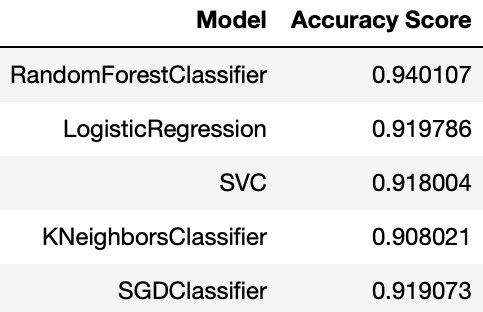

We can perform further cross validation and hyper parameter tuning to get better results, at teh end i have performed a feature importance test to find the top 10 most important feature:


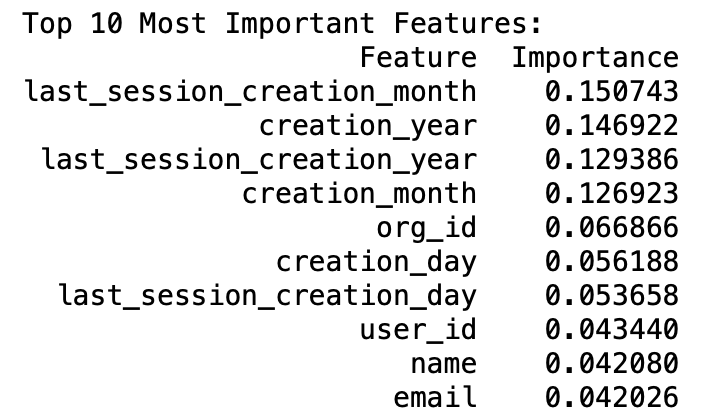

## Investigation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('takehome_user_engagement.csv')
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
df1.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [5]:
df2 = pd.read_csv('takehome_users.csv')
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
df2.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

Let's impute the missing values in the user data set and convert the creation time column to datetime. 

In [8]:
df2['last_session_creation_time'].fillna(df2['last_session_creation_time'].mean(), inplace=True)

In [9]:
df2['invited_by_user_id'].fillna(-1, inplace=True)

In [10]:
df2['creation_time'] = pd.to_datetime(df2['creation_time'])

To merge both dataframes on user id, we have to rename the column object id in df2 that contain user id. 

In [11]:
df2.rename(columns={'object_id':'user_id'}, inplace=True)

In [12]:
df2.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
from datetime import timedelta
df1['time_stamp'] = pd.to_datetime(df1['time_stamp'])

# Sort the DataFrame by 'user_id' and 'time_stamp'
df1_sorted = df1.sort_values(['user_id', 'time_stamp'], ignore_index=True)

# Calculate time differences between consecutive logins for each user
df1['time_diff'] = df1_sorted.groupby('user_id')['time_stamp'].diff()

# Ensure 'time_diff' contains only numeric values (total seconds)
df1_sorted['time_diff'] = df1_sorted['time_diff'].dt.total_seconds()

# Identify adopted users based on the updated criteria
adopted_users = df1_sorted.groupby('user_id')['time_diff'].apply(
    lambda group: any(group.rolling(window=3, min_periods=1).sum() <= 7*24*3600)  # 7 days in seconds
).reset_index()

# Rename the columns
adopted_users.columns = ['user_id', 'adopted_user']

# Print the DataFrame with one row per user indicating whether they are adopted or not
adopted_users.head()


,user_id,adopted_user
0,1,False
1,2,False
2,3,False
3,4,False
4,5,False


In [15]:
adopted_users['adopted_user'].value_counts()

False    7011
True     1812
Name: adopted_user, dtype: int64

In [16]:
adopted_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       8823 non-null   int64
 1   adopted_user  8823 non-null   bool 
dtypes: bool(1), int64(1)
memory usage: 77.7 KB


In [17]:
# Merge df2 and adopted_users based on 'user_id'
df_merged = pd.merge(df2, adopted_users, on='user_id', how='left')

In [18]:
# drop NaN values in 'adopted_user' column
df_merged.dropna(subset=['adopted_user'], inplace=True)

In [19]:
df_merged['adopted_user'] = df_merged['adopted_user'].astype(int)
df_merged

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:00,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0
11996,11997,2013-01-10 18:28:00,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,-1.0,0
11997,11998,2014-04-27 12:45:00,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0
11998,11999,2012-05-31 11:55:00,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,-1.0,0


In [20]:
print(df_merged['adopted_user'].unique())
print(df_merged['adopted_user'].value_counts())

[0 1]
0    7011
1    1812
Name: adopted_user, dtype: int64


In [21]:
df_merged.isna().sum()

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adopted_user                  0
dtype: int64

In [22]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          8823 non-null   float64       
 10  adopted_user                8823 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
m

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_merged['name'] = label_encoder.fit_transform(df_merged['name'])
df_merged['email'] = label_encoder.fit_transform(df_merged['email'])

In [24]:
df_merged = pd.get_dummies(df_merged, columns=['creation_source'], prefix='source')

In [25]:
df_merged

,user_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:00,1562,778,1.398139e+09,1,0,11,10803.0,0,1,0,0,0,0
1,2,2013-11-15 03:45:00,6280,5439,1.396238e+09,0,0,1,316.0,0,0,1,0,0,0
2,3,2013-03-19 23:14:00,959,5733,1.363735e+09,0,0,94,1525.0,0,0,1,0,0,0
3,4,2013-05-21 08:09:00,1570,5949,1.369210e+09,0,0,1,5151.0,0,1,0,0,0,0
4,5,2013-01-17 10:14:00,6447,2760,1.358850e+09,0,0,193,5240.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:00,5282,7111,1.378448e+09,0,0,89,8263.0,0,0,1,0,0,0
11996,11997,2013-01-10 18:28:00,2602,402,1.358275e+09,0,0,200,-1.0,0,0,0,0,0,1
11997,11998,2014-04-27 12:45:00,3387,3213,1.398603e+09,1,1,83,8074.0,0,1,0,0,0,0
11998,11999,2012-05-31 11:55:00,2414,8369,1.338638e+09,0,0,6,-1.0,0,0,0,1,0,0


In [26]:
#convert the datatypes to datetime

df_merged['last_session_creation_time'] = pd.to_datetime(df_merged['last_session_creation_time'], unit='s')

df_merged['creation_time'] = pd.to_datetime(df_merged['creation_time'])

# Extract year, month, and day
df_merged['creation_year'] = df_merged['creation_time'].dt.year
df_merged['creation_month'] = df_merged['creation_time'].dt.month
df_merged['creation_day'] = df_merged['creation_time'].dt.day
df_merged['last_session_creation_year'] = df_merged['last_session_creation_time'].dt.year
df_merged['last_session_creation_month'] = df_merged['last_session_creation_time'].dt.month
df_merged['last_session_creation_day'] = df_merged['last_session_creation_time'].dt.day

# Drop the original 'creation_time' and 'last_session_creation_time' columns or any other non-numeric columns
df_merged = df_merged.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [27]:
df_merged

,user_id,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,creation_year,creation_month,creation_day,last_session_creation_year,last_session_creation_month,last_session_creation_day
0,1,1562,778,1,0,11,10803.0,0,1,0,0,0,0,2014,4,22,2014,4,22
1,2,6280,5439,0,0,1,316.0,0,0,1,0,0,0,2013,11,15,2014,3,31
2,3,959,5733,0,0,94,1525.0,0,0,1,0,0,0,2013,3,19,2013,3,19
3,4,1570,5949,0,0,1,5151.0,0,1,0,0,0,0,2013,5,21,2013,5,22
4,5,6447,2760,0,0,193,5240.0,0,1,0,0,0,0,2013,1,17,2013,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,5282,7111,0,0,89,8263.0,0,0,1,0,0,0,2013,9,6,2013,9,6
11996,11997,2602,402,0,0,200,-1.0,0,0,0,0,0,1,2013,1,10,2013,1,15
11997,11998,3387,3213,1,1,83,8074.0,0,1,0,0,0,0,2014,4,27,2014,4,27
11998,11999,2414,8369,0,0,6,-1.0,0,0,0,1,0,0,2012,5,31,2012,6,2


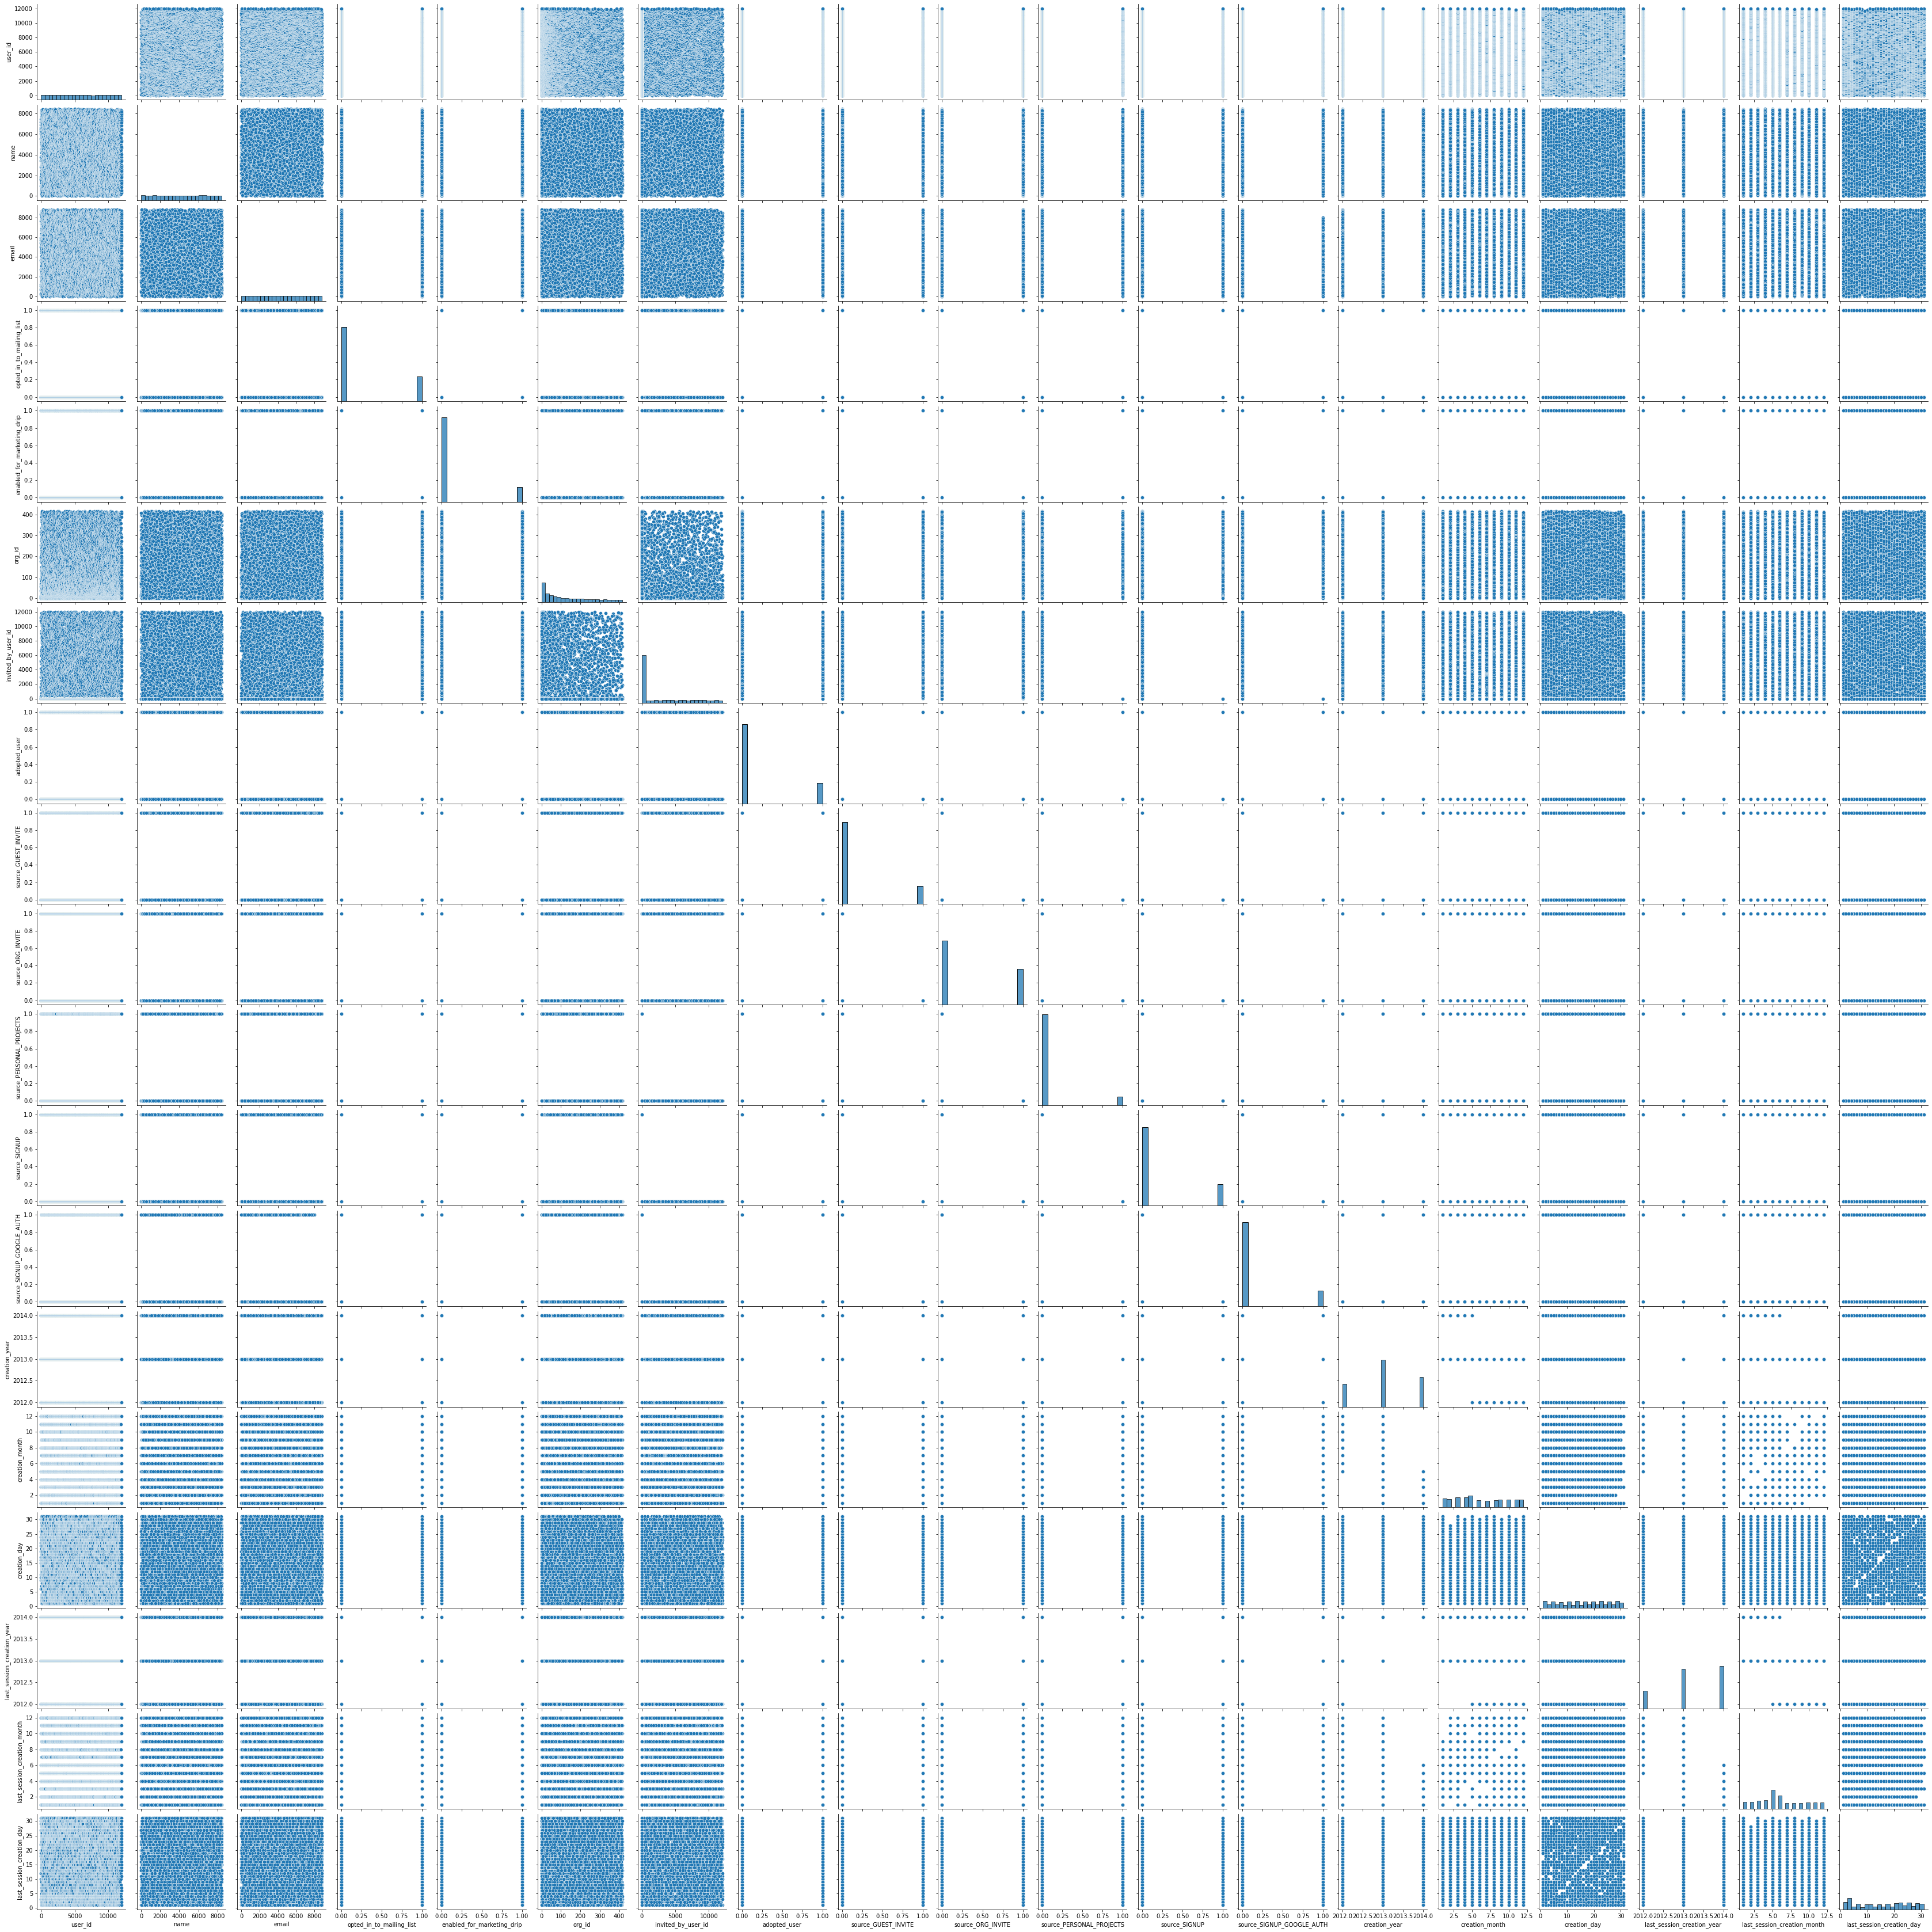

In [28]:
sns.pairplot(df_merged, height=2.5)
plt.show()

In [29]:
X = df_merged.drop('adopted_user', axis=1)
y = df_merged['adopted_user']

In [30]:
print(df_merged['adopted_user'].unique())
print(df_merged['adopted_user'].value_counts())

[0 1]
0    7011
1    1812
Name: adopted_user, dtype: int64


/Users/irtazaaslam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adopted_user', ylabel='count'>

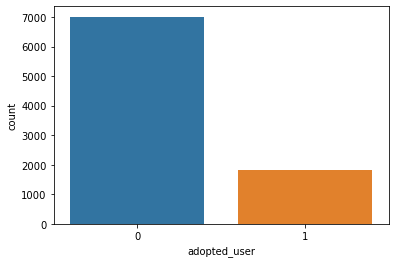

In [31]:
sns.countplot(df_merged['adopted_user'])

We have an imbalanced class in our target variable. We can use techniques like SMOTE to handle class imbalance.

In [32]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)

In [33]:
y_res.value_counts()

0    7011
1    7011
Name: adopted_user, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define a list of models to iterate through
models = [
    RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    SGDClassifier()
]

# Initialize lists to store model names and their corresponding accuracy scores
model_names = []
accuracy_scores = []

for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    acc_score = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print the results
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {acc_score}")
    print(f"Classification Report:\n{class_report}")
    print("="*50)

    # Store model name and accuracy score
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(acc_score)



Model: RandomForestClassifier
Accuracy: 0.9401069518716577
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1442
           1       0.96      0.91      0.94      1363

    accuracy                           0.94      2805
   macro avg       0.94      0.94      0.94      2805
weighted avg       0.94      0.94      0.94      2805

Model: LogisticRegression
Accuracy: 0.9197860962566845
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1442
           1       0.97      0.86      0.91      1363

    accuracy                           0.92      2805
   macro avg       0.93      0.92      0.92      2805
weighted avg       0.92      0.92      0.92      2805

Model: SVC
Accuracy: 0.9180035650623886
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1442
           1  

In [38]:
# Create a DataFrame to compare model accuracies
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy Score': accuracy_scores
})

# Print the results DataFrame
results_df.head()

,Model,Accuracy Score
0,RandomForestClassifier,0.940107
1,LogisticRegression,0.919786
2,SVC,0.918004
3,KNeighborsClassifier,0.908021
4,SGDClassifier,0.919073


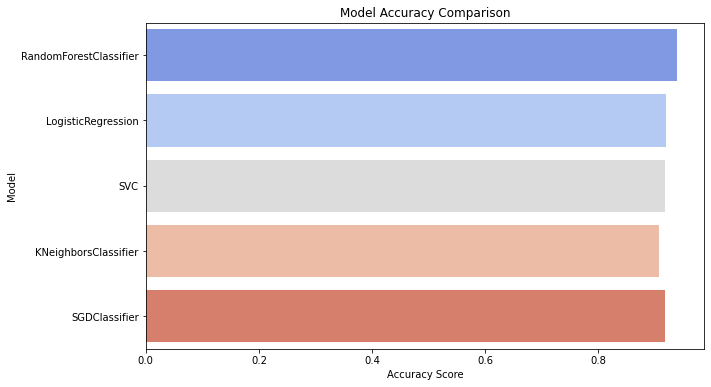

In [39]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=model_names, palette="coolwarm")
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.show()

## Feature Importance

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = model.predict(X_test)


feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_features = 10  # Change this to the number of top features you want to display
print(f'    Top {top_features} Most Important Features:')
print(importances_df.head(top_features))


    Top 10 Most Important Features:
                        Feature  Importance
16  last_session_creation_month    0.150743
12                creation_year    0.146922
15   last_session_creation_year    0.129386
13               creation_month    0.126923
5                        org_id    0.066866
14                 creation_day    0.056188
17    last_session_creation_day    0.053658
0                       user_id    0.043440
1                          name    0.042080
2                         email    0.042026
